In [296]:
# Importamos las librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

pd.set_option('display.max_columns', 100) # Con esto garantizo el ver todas las columnas.
from sklearn.model_selection import train_test_split

df_final = pd.read_csv('Accidentefinal.csv', sep=';', decimal='.')
df_train, df_test = train_test_split(df_final, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {df_train.shape}')
print(f'Dimensiones del dataset de test: {df_test.shape}')

# Guardamos
df_train.to_csv('df_train.csv', sep=';', decimal='.', index=False)
df_test.to_csv('df_test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (159992, 37)
Dimensiones del dataset de test: (39999, 37)


In [297]:
# cargamos el dataframe de train y trabajamos con el
df = pd.read_csv('df_train.csv', sep=';', decimal='.')

In [298]:
df.head()

,Unnamed: 0,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,Lluvia,Niebla,Seco,Nieve,Mojada,Aceite,Barro,Gravilla,Hielo.2,Hielo.3,Seca_limpia,Tipo_accidente,Tipo_vehiculo,Tipo_persona,Sexo,Tramo_edad,Latitud,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,148526,HL,DE 16:00 A 16:59,DOMINGO,VICALVARO,AVENIDA DEL MEDITERRANEO KM.,2011/8899,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,TURISMO,VIAJERO,MUJER,DE 30 A 34 ANOS,40.258915,-3.910258,5.966126,muy lejos,20.034451,muy lejos,2011-02-10,2011,2,10,0
1,118444,HL,DE 17:00 A 17:59,MIERCOLES,CIUDAD LINEAL,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,2015/5891,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,CHOQUE CON OBJETO FIJO,TURISMO,CONDUCTOR,HOMBRE,DE 30 A 34 ANOS,40.436970,-3.652941,0.795508,lejos,1.342058,muy lejos,2015-06-24,2015,6,24,1
2,180939,HL,DE 4:00 A 4:59,VIERNES,CIUDAD LINEAL,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,2012/7706,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,TURISMO,CONDUCTOR,HOMBRE,DE 25 A 29 AÑOS,40.429899,-3.641188,1.809418,muy lejos,1.650425,muy lejos,2012-08-31,2012,8,31,1
3,53063,HL,DE 5:00 A 5:59,MARTES,ARGANZUELA,PLAZA DEL EMPERADOR CARLOS V - PASEO DE LA INF...,2013/887,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,ATROPELLO,NO ASIGNADO,PEATON,HOMBRE,DE 35 A 39 AÑOS,40.408140,-3.692851,0.178982,Muy cerca,1.714715,muy lejos,2013-01-29,2013,1,29,1
4,175510,HL,DE 14:00 A 14:59,SABADO,ARGANZUELA,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,2014/5084,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,CAÍDA BICICLETA,BICICLETA,CONDUCTOR,MUJER,DE 35 A 39 AÑOS,40.386535,-3.694110,0.588265,lejos,0.080297,Muy cerca,2014-05-31,2014,5,31,0


In [299]:
# comprobamos que no hay valores nulos
df.isna().sum()

Unnamed: 0       0
Lesividad        0
Rango_horario    0
Dia_semana       0
Distrito         0
                ..
Fecha_formato    0
Year             0
Mes              0
Dia              0
Dia_habil        0
Length: 37, dtype: int64

In [300]:
# eliminamos la columna unnamed
df=df.drop(['Unnamed: 0'], axis=1)

In [301]:
df.columns

Index(['Lesividad', 'Rango_horario', 'Dia_semana', 'Distrito',
       'Lugar_accidente', 'Parte', 'Granizo', 'Hielo', 'Hielo.1', 'Lluvia',
       'Niebla', 'Seco', 'Nieve', 'Mojada', 'Aceite', 'Barro', 'Gravilla',
       'Hielo.2', 'Hielo.3', 'Seca_limpia', 'Tipo_accidente', 'Tipo_vehiculo',
       'Tipo_persona', 'Sexo', 'Tramo_edad', 'Latitud', 'Longitud',
       'Distancia_ocio_km', 'Lejania_ocio', 'Distancia_radares_km',
       'Lejania_radares', 'Fecha_formato', 'Year', 'Mes', 'Dia', 'Dia_habil'],
      dtype='object')

### Analizamos Tipo_vehiculo que sera nuestra variable objetivo

In [302]:
df['Tipo_vehiculo'].value_counts()

TURISMO            93093
MOTOCICLETA        24947
NO ASIGNADO        11491
FURGONETA           6835
AUTO-TAXI           6177
AUTOBUS-AUTOCAR     5267
CICLOMOTOR          4690
BICICLETA           4008
CAMION              1679
VARIOS              1401
AMBULANCIA           370
VEH.3 RUEDAS          34
Name: Tipo_vehiculo, dtype: int64

In [303]:
# eliminamos lo no asignado
df = df.drop(df[df['Tipo_vehiculo']=='NO ASIGNADO'].index)
df = df.drop(df[df['Tipo_vehiculo']=='VARIOS'].index)

In [304]:
# Moto, Motocicleta y vehiculo de 3 ruedas lo remplazamos por moto
df=df.replace({"MOTOCICLETA":"MOTO", 
            "CICLOMOTOR":"MOTO",
            "VEH.3 RUEDAS":"MOTO"})

In [305]:
df['Tipo_vehiculo'].value_counts()

TURISMO            93093
MOTO               29671
FURGONETA           6835
AUTO-TAXI           6177
AUTOBUS-AUTOCAR     5267
BICICLETA           4008
CAMION              1679
AMBULANCIA           370
Name: Tipo_vehiculo, dtype: int64

In [306]:
# vamos a darle valor numerico al tipo de vehiculo
df=df.replace({"TURISMO": 0, 
            "MOTO": 1,
            "FURGONETA": 2,
            "AUTO-TAXI": 3,
            "AUTOBUS-AUTOCAR": 4,
            "BICICLETA": 5,
            "CAMION": 6,
            "AMBULANCIA": 7})

In [307]:
# Nos llevamos nuestra variable objetivo, a la primera columna para facilitar luego el código.
col_name="Tipo_vehiculo"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)

In [308]:
df.head()

,Tipo_vehiculo,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Parte,Granizo,Hielo,Hielo.1,Lluvia,Niebla,Seco,Nieve,Mojada,Aceite,Barro,Gravilla,Hielo.2,Hielo.3,Seca_limpia,Tipo_accidente,Tipo_persona,Sexo,Tramo_edad,Latitud,Longitud,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Fecha_formato,Year,Mes,Dia,Dia_habil
0,0,HL,DE 16:00 A 16:59,DOMINGO,VICALVARO,AVENIDA DEL MEDITERRANEO KM.,2011/8899,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,VIAJERO,MUJER,DE 30 A 34 ANOS,40.258915,-3.910258,5.966126,muy lejos,20.034451,muy lejos,2011-02-10,2011,2,10,0
1,0,HL,DE 17:00 A 17:59,MIERCOLES,CIUDAD LINEAL,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,2015/5891,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,CHOQUE CON OBJETO FIJO,CONDUCTOR,HOMBRE,DE 30 A 34 ANOS,40.436970,-3.652941,0.795508,lejos,1.342058,muy lejos,2015-06-24,2015,6,24,1
2,0,HL,DE 4:00 A 4:59,VIERNES,CIUDAD LINEAL,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,2012/7706,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,CONDUCTOR,HOMBRE,DE 25 A 29 AÑOS,40.429899,-3.641188,1.809418,muy lejos,1.650425,muy lejos,2012-08-31,2012,8,31,1
4,5,HL,DE 14:00 A 14:59,SABADO,ARGANZUELA,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,2014/5084,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,CAÍDA BICICLETA,CONDUCTOR,MUJER,DE 35 A 39 AÑOS,40.386535,-3.694110,0.588265,lejos,0.080297,Muy cerca,2014-05-31,2014,5,31,0
5,0,IL,DE 13:00 A 13:59,SABADO,HORTALEZA,CALLE DE AGATHA CHRISTIE - CALLE DE SAN ENRIQU...,2017/3563,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,COLISIÓN DOBLE,CONDUCTOR,HOMBRE,DE 40 A 44 AÑOS,40.501679,-3.635118,4.895411,muy lejos,4.141752,muy lejos,2017-08-04,2017,8,4,0


### Analizamos Lesividad

In [309]:
df['Lesividad'].value_counts()

IL    73770
HL    68829
HG     4404
MT       97
Name: Lesividad, dtype: int64

In [310]:
# damos valores numericos a lesividad y lo dejamos como esta
df=df.replace({"IL":0, 
                "HL":1,
                "HG":2,
                "MT":3})

### Analizamos Rango Horario

In [311]:
df['Rango_horario'].value_counts()

DE 14:00 A 14:59    10722
DE 19:00 A 19:59    10283
DE 20:00 A 20:59     9864
DE 18:00 A 18:59     9513
DE 13:00 A 13:59     9277
                    ...  
DE 1:00 A 1:59       2088
DE 2:00 A 2:59       1540
DE 3:00 A 3:59       1412
DE 5:00 A 5:59       1236
DE 4:00 A 4:59       1175
Name: Rango_horario, Length: 24, dtype: int64

In [312]:
# damos valores numericos y lo dejamos como esta
df=df.replace({"DE 00:00 A 00:59": 0, 
            "DE 1:00 A 1:59": 1,
            "DE 2:00 A 2:59": 2,
            "DE 3:00 A 3:59": 3,
            "DE 4:00 A 4:59": 4,
            "DE 5:00 A 5:59": 5,
            "DE 6:00 A 6:59": 6,
            "DE 7:00 A 7:59": 7,
            "DE 8:00 A 8:59": 8,
            "DE 9:00 A 9:59": 9,
            "DE 10:00 A 10:59": 10,
            "DE 11:00 A 11:59": 11,
            "DE 12:00 A 12:59": 12,
            "DE 13:00 A 13:59": 13,
            "DE 14:00 A 14:59": 14,
            "DE 15:00 A 15:59": 15,
            "DE 16:00 A 16:59": 16,
            "DE 17:00 A 17:59": 17,
            "DE 18:00 A 18:59": 18,
            "DE 19:00 A 19:59": 19,
            "DE 20:00 A 20:59": 20,
            "DE 21:00 A 21:59": 21,
            "DE 22:00 A 22:59": 22,
            "DE 23:00 A 23:59": 23})


### Analizamos Dia_semana

In [313]:
# damos valores numericos y lo dejamos como esta
df['Dia_semana'].value_counts()

VIERNES      25100
JUEVES       22524
MIERCOLES    22407
MARTES       22077
LUNES        21149
SABADO       17963
DOMINGO      15880
Name: Dia_semana, dtype: int64

In [314]:
# damos valores numericos y lo dejamos como esta
df=df.replace({"LUNES": 1, 
                "MARTES": 2,
                "MIERCOLES": 3,
                "JUEVES": 4,
                "VIERNES": 5,
                "SABADO": 6,
                "DOMINGO": 7})

### Analizamos Distrito

In [315]:
# de momento lo dejamos como esta y luego la convertimos a numerica
df['Distrito'].value_counts()

CHAMARTIN                         11379
SALAMANCA                         11074
CENTRO                            10115
CIUDAD LINEAL                      9628
PUENTE DE VALLECAS                 9237
                                  ...  
MORATALAZ                          3636
VILLA DE VALLECAS                  2664
VICALVARO                          1791
BARAJAS                            1657
VILLA DE VALLECAS                   300
Name: Distrito, Length: 22, dtype: int64

### Analizamos Lugar_accidente

In [316]:
# de momento lo dejamos como esta y luego la convertimos a numerica
df['Lugar_accidente'].value_counts()

AUTOVIA M-30 CALZADA 1 KM.                                       5100
AUTOVIA M-30 CALZADA 2 KM.                                       4211
PASEO DE LA CASTELLANA                                           3201
CALLE DE ALCALA                                                  2338
CALLE DE BRAVO MURILLO                                            922
                                                                 ... 
CALLE DE PERICLES - CALLE DE JAIME TERCERO                          1
CAMINO DE LA ZARZUELA - CALLE DE BLANCA DE CASTILLA                 1
CALLE DE AMANIEL - CALLE DE NOVICIADO                               1
AVENIDA DEL CAMINO DE SANTIAGO - PASEO DE LA TIERRA DE MELIDE       1
CALLE DE RICARDO BELLVER - CALLE DE PUEBLA DE MONTALBAN             1
Name: Lugar_accidente, Length: 14593, dtype: int64

### Analizamos Parte

In [317]:
df['Parte'].value_counts()

2012/11769    19
2018/2669     19
2017/5734     18
2017/9166     16
2018/7943     16
              ..
2014/9916      1
2018/3340      1
2014/1258      1
2010/4983      1
2010/1805      1
Name: Parte, Length: 74970, dtype: int64

In [318]:
# eliminamos la columna parte ya que es el parte que crea la policia y no creo que sea relevante
df=df.drop(['Parte'], axis=1)

### Analizamos Granizo

In [319]:
df['Granizo'].value_counts()

NO    147082
SI        18
Name: Granizo, dtype: int64

### Analizamos Hielo

In [320]:
df['Hielo'].value_counts()

NO    146976
SI       124
Name: Hielo, dtype: int64

### Analizamos Hielo.1

In [321]:
df['Hielo.1'].value_counts()

NO    146891
SI       209
Name: Hielo.1, dtype: int64

### Analizamos Lluvia

In [322]:
df['Lluvia'].value_counts()

NO    130061
SI     17039
Name: Lluvia, dtype: int64

### Analizamos Niebla

In [323]:
df['Niebla'].value_counts()

NO    146751
SI       349
Name: Niebla, dtype: int64

### Analizamos Seco

In [324]:
df['Seco'].value_counts()

SI    129533
NO     17567
Name: Seco, dtype: int64

### Analizamos Nieve

In [325]:
df['Nieve'].value_counts()

NO    146880
SI       220
Name: Nieve, dtype: int64

### Analizamos Mojada

In [326]:
df['Mojada'].value_counts()

NO    127685
SI     19415
Name: Mojada, dtype: int64

### Analizamos Aceite

In [327]:
df['Aceite'].value_counts()

NO    146758
SI       342
Name: Aceite, dtype: int64

### Analizamos Barro

In [328]:
df['Barro'].value_counts()

NO    146983
SI       117
Name: Barro, dtype: int64

### Analizamos Gravilla

In [329]:
df['Gravilla'].value_counts()

NO    146793
SI       307
Name: Gravilla, dtype: int64

### Analizamos Hielo.2

In [330]:
df['Hielo.2'].value_counts()

NO    146976
SI       124
Name: Hielo.2, dtype: int64

In [331]:
# vemos que es la misma que hielo asi que la eliminamos
df=df.drop(['Hielo.2'], axis=1)

### Analizamos Hielo.3

In [332]:
df['Hielo.3'].value_counts()

NO    146891
SI       209
Name: Hielo.3, dtype: int64

In [333]:
# vemos que es la misma que hielo1 asi que la eliminamos
df=df.drop(['Hielo.3'], axis=1)

### Analizamos Seca_limpia

In [334]:
df['Seca_limpia'].value_counts()

SI    126421
NO     20679
Name: Seca_limpia, dtype: int64

### Creamos y analizamos Condiciones_adversas

In [335]:
# Vamos a crear una columna con condiciones_adversas,
# meter el estado de la calzada ya que por si solas no son relevantes
df['Condiciones_adversas']=0

In [336]:
df['Condiciones_adversas'].value_counts()

0    147100
Name: Condiciones_adversas, dtype: int64

In [337]:
df['Granizo'] = df['Granizo'].map({'SI': 1, 'NO': 0})
df['Hielo'] = df['Hielo'].map({'SI': 1, 'NO': 0})
df['Hielo.1'] = df['Hielo.1'].map({'SI': 1, 'NO': 0})
df['Lluvia'] = df['Lluvia'].map({'SI': 1, 'NO': 0})
df['Niebla'] = df['Niebla'].map({'SI': 1, 'NO': 0})
df['Seco'] = df['Seco'].map({'SI': 1, 'NO': 0})
df['Nieve'] = df['Nieve'].map({'SI': 1, 'NO': 0})
df['Mojada'] = df['Mojada'].map({'SI': 1, 'NO': 0})
df['Aceite'] = df['Aceite'].map({'SI': 1, 'NO': 0})
df['Barro'] = df['Barro'].map({'SI': 1, 'NO': 0})
df['Gravilla'] = df['Gravilla'].map({'SI': 1, 'NO': 0})
df['Seca_limpia'] = df['Seca_limpia'].map({'SI': 1, 'NO': 0})


In [338]:
# Vamos a crear Condiciones_adversas, que será la suma de cualquier condición, ya sea climática o del mal estado de la carretera
df['Condiciones_adversas'] = df['Granizo'] + df['Hielo'] + df['Hielo.1'] +df['Lluvia'] + df['Niebla'] + df['Nieve'] + df['Mojada'] + df['Aceite'] + df['Barro'] + df['Gravilla']
df['Condiciones_adversas'] = (df['Condiciones_adversas'] > 0)*1 # Con esto hacemos que todo lo que sea superior a 1 lo codificamos como 1.

In [339]:
df['Condiciones_adversas'].value_counts()

0    126241
1     20859
Name: Condiciones_adversas, dtype: int64

In [340]:
# eliminamos el los estados de la calzada y nos quedamos con condiciones adversas
df=df.drop(['Granizo','Hielo','Hielo.1','Lluvia','Niebla','Seco','Nieve','Mojada','Aceite','Barro','Gravilla','Seca_limpia'], axis=1)

### Analizamos Tipo_accidente

In [341]:
# de momento lo dejamos como esta y luego la convertimos a numerica
df['Tipo_accidente'].value_counts()

COLISIÓN DOBLE             95569
COLISIÓN MÚLTIPLE          20113
ATROPELLO                  11216
CAÍDA MOTOCICLETA           8420
CHOQUE CON OBJETO FIJO      5822
CAÍDA VIAJERO BUS           1795
CAÍDA CICLOMOTOR            1576
CAÍDA BICICLETA             1454
VUELCO                       594
OTRAS CAUSAS                 534
CAÍDA VEHÍCULO 3 RUEDAS        7
Name: Tipo_accidente, dtype: int64

### Analizamos Tipo_persona

In [342]:
df['Tipo_persona'].value_counts()

CONDUCTOR    111469
VIAJERO       35625
PEATON            6
Name: Tipo_persona, dtype: int64

In [343]:
# lo convertimos a numerico
df=df.replace({"CONDUCTOR": 0,
                "VIAJERO": 1,
                "PEATON": 2})

### Analizamos Sexo

In [344]:
df['Sexo'].value_counts()

HOMBRE         99052
MUJER          47539
NO ASIGNADO      509
Name: Sexo, dtype: int64

In [345]:
# eliminamos la no asignado
df = df.drop(df[df['Sexo']=='NO ASIGNADO'].index)

In [346]:
# lo convertimos a numerico
df=df.replace({"HOMBRE": 0,
                "MUJER": 1})

### Analizamos Tramo_edad

In [347]:
df['Tramo_edad'].value_counts()

DE 30 A 34 ANOS      19837
DE 25 A 29 AÑOS      19396
DE 35 A 39 AÑOS      19056
DE 40 A 44 AÑOS      16432
DE 45 A 49 AÑOS      13802
DE 21 A 24 AÑOS      12662
DE 50 A 54 AÑOS      11240
DE 55 A 59 AÑOS       7623
DE 18 A 20 AÑOS       5845
DE 60 A 64 AÑOS       5026
DE MAS DE 74 AÑOS     2844
DE 65 A 69 AÑOS       2824
DE 70 A 74 AÑOS       2029
DESCONOCIDA           1929
DE 0 A 5 AÑOS         1848
DE 10 A 14 AÑOS       1504
DE 15 A 17 AÑOS       1401
DE 6 A 9 AÑOS         1293
Name: Tramo_edad, dtype: int64

In [348]:
# eliminamos edad desconocida
df = df.drop(df[df['Tramo_edad']=='DESCONOCIDA'].index)

In [349]:
# convertimos a numerica
df=df.replace({"DE 0 A 5 AÑOS": 2.5,
            "DE 6 A 9 AÑOS": 7.5,
            "DE 10 A 14 AÑOS": 12,
            "DE 15 A 17 AÑOS": 16,
            "DE 18 A 20 AÑOS": 19,
            "DE 21 A 24 AÑOS": 22.5,
            "DE 25 A 29 AÑOS": 27,
            "DE 30 A 34 ANOS": 32,
            "DE 35 A 39 AÑOS": 37,
            "DE 40 A 44 AÑOS": 42,
            "DE 45 A 49 AÑOS": 47,
            "DE 50 A 54 AÑOS": 52,
            "DE 55 A 59 AÑOS": 57,
            "DE 60 A 64 AÑOS": 62,
            "DE 65 A 69 AÑOS": 67,
            "DE 70 A 74 AÑOS": 72,
            "DE MAS DE 74 AÑOS": 80})

### Analizamos Latitud

In [350]:
df['Latitud'].value_counts()

40.481326    1563
40.406353    1492
40.490213    1451
40.396602    1217
40.441420    1205
             ... 
40.462812       1
40.392483       1
40.448429       1
40.468377       1
40.495501       1
Name: Latitud, Length: 17027, dtype: int64

In [351]:
# la vamos a eliminar ya que solo la necesitabamos para unir los dataset
df=df.drop(['Latitud'], axis=1)

### Analizamos Longitud

In [352]:

df['Longitud'].value_counts()

-3.673715    1563
-3.666083    1492
-3.698348    1451
-3.703340    1217
-3.691957    1205
             ... 
-3.644010       1
-3.699818       1
-3.689514       1
-3.702160       1
-3.676164       1
Name: Longitud, Length: 17042, dtype: int64

In [353]:
# la vamos a eliminar ya que solo la necesitabamos para unir los dataset
df=df.drop(['Longitud'], axis=1)

### Analizamos Distancia_ocio_km

In [354]:
#la dejamos como esta
df['Distancia_ocio_km'].value_counts()

1.264343    1563
0.554934    1492
0.327146    1451
0.140841    1217
0.283663    1205
            ... 
1.232039       1
0.316703       1
0.125492       1
1.247527       1
4.078123       1
Name: Distancia_ocio_km, Length: 17151, dtype: int64

### Analizamos Lejania_ocio

In [355]:
df['Lejania_ocio'].value_counts()

muy lejos    58698
Cerca        31819
Muy cerca    28539
lejos        25606
Name: Lejania_ocio, dtype: int64

In [356]:
# lo convertimos a numerico
df=df.replace({"Muy cerca": 0,
                "Cerca": 1,
                "lejos": 2,
                "muy lejos": 3})

### Analizamos Distancia_radares_km

In [357]:
# lo dejamos como esta
df['Distancia_radares_km'].value_counts()

0.226065    1563
1.055964    1492
1.538157    1451
0.186728    1217
2.762511    1205
            ... 
1.583101       1
0.951510       1
2.825449       1
3.579825       1
1.902687       1
Name: Distancia_radares_km, Length: 17151, dtype: int64

### Analizamos Lejania_radares

In [358]:
# lo dejamos como esta
df['Lejania_radares'].value_counts()

3    112397
2     21262
1      7981
0      3022
Name: Lejania_radares, dtype: int64

### Analizamos Fecha_formato

In [359]:
df['Fecha_formato'].value_counts()

2013-10-25    131
2017-12-21    105
2016-12-02    104
2013-12-13    100
2017-11-28     99
             ... 
2010-12-09      8
2015-02-08      7
2013-03-25      7
2013-08-18      4
2011-04-23      4
Name: Fecha_formato, Length: 3286, dtype: int64

In [360]:
# la eliminamos ya que hemos sacado año, mes, dia y festivo
df=df.drop(['Fecha_formato'], axis=1)

### Analizamos Year

In [361]:
# lo dejamos como esta
df['Year'].value_counts()

2018    17440
2017    17250
2016    16758
2015    16315
2014    16257
2012    15509
2011    15278
2013    15191
2010    14664
Name: Year, dtype: int64

### Analizamos Mes

In [362]:
#lo dejamos como esta
df['Mes'].value_counts()

10    13316
11    13299
12    12917
5     12826
6     12644
9     12431
1     11959
4     11887
3     11604
7     11580
2     10985
8      9214
Name: Mes, dtype: int64

### Analizamos Dia

In [363]:
# lo dejamos como esta
df['Dia'].value_counts()

10    5484
6     5337
3     5116
19    5042
20    4987
      ... 
30    4489
4     4470
1     3948
8     3268
31    2552
Name: Dia, Length: 31, dtype: int64

### Analizamos Dia_habil

In [364]:
# Lo dejamos como esta
df['Dia_habil'].value_counts()

1    108754
0     35908
Name: Dia_habil, dtype: int64

In [365]:
df.head().T

,0,1,2,4,5
Tipo_vehiculo,0,0,0,5,0
Lesividad,1,1,1,1,0
Rango_horario,16,17,4,14,13
Dia_semana,7,3,5,6,6
Distrito,VICALVARO,CIUDAD LINEAL,CIUDAD LINEAL,ARGANZUELA,HORTALEZA
Lugar_accidente,AVENIDA DEL MEDITERRANEO KM.,CALLE DE LA VIRGEN DE AFRICA - CALLE DE LA VIR...,CALLE DE ASCAO - CALLE DE GUTIERRE DE CETINA,CALLE DE RICARDO DAMAS - CALLE DE RICARDO GOIZ...,CALLE DE AGATHA CHRISTIE - CALLE DE SAN ENRIQU...
Tipo_accidente,COLISIÓN DOBLE,CHOQUE CON OBJETO FIJO,COLISIÓN DOBLE,CAÍDA BICICLETA,COLISIÓN DOBLE
Tipo_persona,1,0,0,0,0
Sexo,1,0,0,1,0
Tramo_edad,32,32,27,37,42


In [366]:
categorical = ['Distrito', 'Lugar_accidente', 'Tipo_accidente']
# En train creamos un dict para usarlo después en test
mean_map = {}
for c in categorical:
    mean = df.groupby(c)['Tipo_vehiculo'].mean()
    df[c] = df[c].map(mean)    
    mean_map[c] = mean

In [367]:
df.dtypes

Tipo_vehiculo             int64
Lesividad                 int64
Rango_horario             int64
Dia_semana                int64
Distrito                float64
Lugar_accidente         float64
Tipo_accidente          float64
Tipo_persona              int64
Sexo                      int64
Tramo_edad              float64
Distancia_ocio_km       float64
Lejania_ocio              int64
Distancia_radares_km    float64
Lejania_radares           int64
Year                      int64
Mes                       int64
Dia                       int64
Dia_habil                 int64
Condiciones_adversas      int32
dtype: object

In [368]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Tipo_vehiculo,144662.0,0.784028,1.386699,0.000000,0.000000,0.000000,1.000000,7.000000
Lesividad,144662.0,0.537930,0.559875,0.000000,0.000000,1.000000,1.000000,3.000000
Rango_horario,144662.0,14.125168,5.547385,0.000000,10.000000,14.000000,19.000000,23.000000
Dia_semana,144662.0,3.854240,1.912067,1.000000,2.000000,4.000000,5.000000,7.000000
Distrito,144662.0,0.784028,0.161784,0.610358,0.649949,0.749454,0.938661,1.165140
Lugar_accidente,144662.0,0.784028,0.603389,0.000000,0.434624,0.725000,1.000000,7.000000
Tipo_accidente,144662.0,0.784028,0.530269,0.435076,0.738715,0.738715,0.738715,4.611456
Tipo_persona,144662.0,0.236482,0.425021,0.000000,0.000000,0.000000,0.000000,2.000000
Sexo,144662.0,0.323361,0.467761,0.000000,0.000000,0.000000,1.000000,1.000000
Tramo_edad,144662.0,38.341351,14.968000,2.500000,27.000000,37.000000,47.000000,80.000000


A primera vista podemos observar como existen outliers, por ejemplo, Distancia_ocio_km y Distancia_radares_km

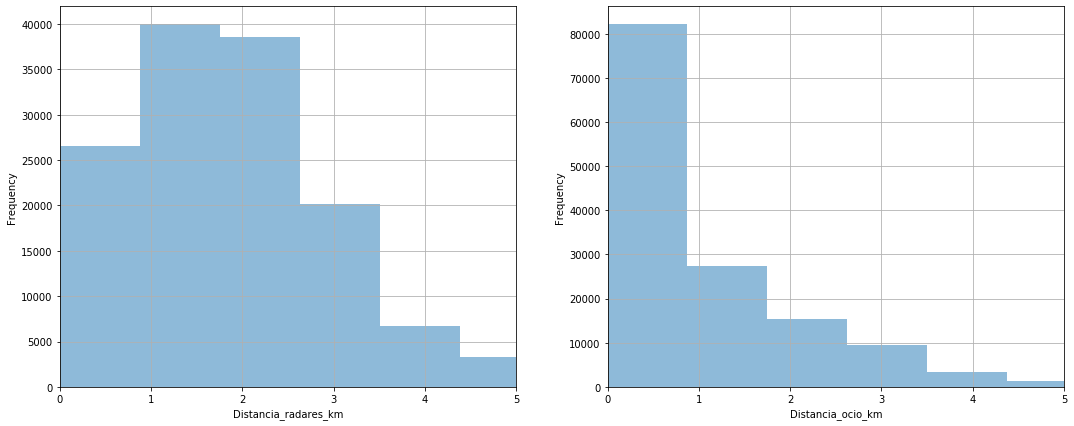

In [369]:
plt.figure(figsize=(18, 7))

plt.subplot(1,2,1)
df['Distancia_radares_km'].plot.hist(alpha=0.5, bins=10000, grid = True, xlim=(0,5))
plt.xlabel('Distancia_radares_km')

plt.subplot(1,2,2)
df['Distancia_ocio_km'].plot.hist(alpha=0.5, bins=10000, grid = True, xlim=(0,5))
plt.xlabel('Distancia_ocio_km')

plt.show()

In [370]:
# vamos observar las distancias
df.sort_values(by=['Distancia_radares_km'],inplace=True,ascending=False)

In [371]:
df['Distancia_radares_km']

140463    8759.490110
74281     8555.893536
99268     8555.893536
110716    8555.893536
72240     8555.893536
             ...     
8588         0.009104
101695       0.009104
48919        0.009104
140160       0.009104
37267        0.008182
Name: Distancia_radares_km, Length: 144662, dtype: float64

In [372]:
# vamos observar las distancias
df.sort_values(by=['Distancia_ocio_km'],inplace=True,ascending=False)

In [373]:
df['Distancia_ocio_km']

140463    8742.642818
99268     8542.427391
110716    8542.427391
72240     8542.427391
74281     8542.427391
             ...     
16795        0.000000
115488       0.000000
63293        0.000000
92131        0.000000
78700        0.000000
Name: Distancia_ocio_km, Length: 144662, dtype: float64

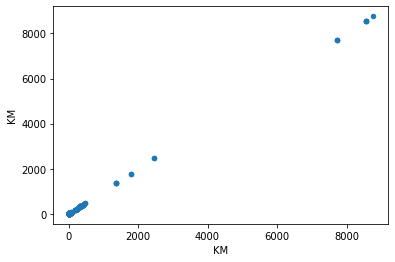

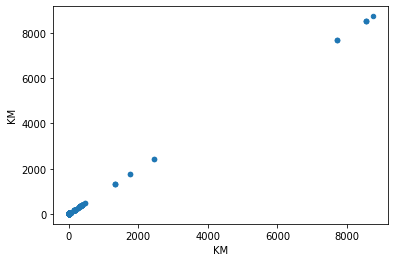

In [374]:
df.plot(kind = 'scatter',x='Distancia_radares_km',y = 'Distancia_radares_km')
plt.xlabel('KM')
plt.ylabel('KM')
plt.show() 

df.plot(kind = 'scatter',x='Distancia_ocio_km',y = 'Distancia_ocio_km')
plt.xlabel('KM')
plt.ylabel('KM')
plt.show() 

In [375]:
# vamos a filtrar las distancias a 100 kilometros
my_filter_ocio = df['Distancia_ocio_km'] <= 100
my_filter_radares = df['Distancia_radares_km'] <= 100

df= df[my_filter_ocio & my_filter_radares]

In [376]:
df.head()

,Tipo_vehiculo,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Tipo_accidente,Tipo_persona,Sexo,Tramo_edad,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Year,Mes,Dia,Dia_habil,Condiciones_adversas
10594,0,0,12,7,0.645228,0.000000,0.824450,1,1,2.5,56.212069,3,56.635021,3,2016,9,10,0,0
61726,6,0,8,1,1.165140,2.833333,0.476132,0,0,47.0,55.317827,3,59.928188,3,2012,3,12,1,0
35257,1,1,21,6,1.165140,2.833333,0.928340,1,1,19.0,55.317827,3,59.928188,3,2014,11,15,0,1
65400,1,1,15,4,1.165140,2.833333,0.944551,0,0,22.5,55.317827,3,59.928188,3,2015,3,19,1,1
110170,3,0,8,1,1.165140,2.833333,0.476132,0,0,47.0,55.317827,3,59.928188,3,2012,3,12,1,0


In [377]:
dato =df.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Tipo_vehiculo           0
Lesividad               0
Rango_horario           0
Dia_semana              0
Distrito                0
Lugar_accidente         0
Tipo_accidente          0
Tipo_persona            0
Sexo                    0
Tramo_edad              0
Distancia_ocio_km       0
Lejania_ocio            0
Distancia_radares_km    0
Lejania_radares         0
Year                    0
Mes                     0
Dia                     0
Dia_habil               0
Condiciones_adversas    0
dtype: int64

### Ahora hacemos los mismos cambios para test

In [379]:
# cargamos el dataframe de test y trabajamos con el
df_test = pd.read_csv('df_test.csv', sep=';', decimal='.')

In [380]:
# eliminamos la columna unnamed
df_test=df_test.drop(['Unnamed: 0'], axis=1)

In [381]:
# eliminamos lo no asignado
df_test = df_test.drop(df_test[df_test['Tipo_vehiculo']=='NO ASIGNADO'].index)
df_test = df_test.drop(df_test[df_test['Tipo_vehiculo']=='VARIOS'].index)

In [382]:
# Moto, Motocicleta y vehiculo de 3 ruedas lo remplazamos por moto
df_test=df_test.replace({"MOTOCICLETA":"MOTO", 
            "CICLOMOTOR":"MOTO",
            "VEH.3 RUEDAS":"MOTO"})

In [383]:
# vamos a darle valor numerico al tipo de vehiculo
df_test=df_test.replace({"TURISMO": 0, 
            "MOTO": 1,
            "FURGONETA": 2,
            "AUTO-TAXI": 3,
            "AUTOBUS-AUTOCAR": 4,
            "BICICLETA": 5,
            "CAMION": 6,
            "AMBULANCIA": 7})

In [384]:
# Nos llevamos nuestra variable objetivo, a la primera columna para facilitar luego el código.
col_name="Tipo_vehiculo"
first_col = df_test.pop(col_name)
df_test.insert(0, col_name, first_col)

In [385]:
# damos valores numericos a lesividad y lo dejamos como esta
df_test=df_test.replace({"IL":0, 
                "HL":1,
                "HG":2,
                "MT":3})

In [386]:
# damos valores numericos y lo dejamos como esta
df_test=df_test.replace({"DE 00:00 A 00:59": 0, 
            "DE 1:00 A 1:59": 1,
            "DE 2:00 A 2:59": 2,
            "DE 3:00 A 3:59": 3,
            "DE 4:00 A 4:59": 4,
            "DE 5:00 A 5:59": 5,
            "DE 6:00 A 6:59": 6,
            "DE 7:00 A 7:59": 7,
            "DE 8:00 A 8:59": 8,
            "DE 9:00 A 9:59": 9,
            "DE 10:00 A 10:59": 10,
            "DE 11:00 A 11:59": 11,
            "DE 12:00 A 12:59": 12,
            "DE 13:00 A 13:59": 13,
            "DE 14:00 A 14:59": 14,
            "DE 15:00 A 15:59": 15,
            "DE 16:00 A 16:59": 16,
            "DE 17:00 A 17:59": 17,
            "DE 18:00 A 18:59": 18,
            "DE 19:00 A 19:59": 19,
            "DE 20:00 A 20:59": 20,
            "DE 21:00 A 21:59": 21,
            "DE 22:00 A 22:59": 22,
            "DE 23:00 A 23:59": 23})


In [387]:
# damos valores numericos y lo dejamos como esta
df_test=df_test.replace({"LUNES": 1, 
                "MARTES": 2,
                "MIERCOLES": 3,
                "JUEVES": 4,
                "VIERNES": 5,
                "SABADO": 6,
                "DOMINGO": 7})

In [388]:
# eliminamos la columna parte ya que es el parte que crea la policia y no creo que sea relevante
df_test=df_test.drop(['Parte'], axis=1)

In [389]:
# vemos que es la misma que hielo asi que la eliminamos
df_test=df_test.drop(['Hielo.2'], axis=1)

In [390]:
# vemos que es la misma que hielo asi que la eliminamos
df_test=df_test.drop(['Hielo.3'], axis=1)

In [391]:
# Vamos a crear una columna con condiciones_adversas,
# meter el estado de la calzada ya que por si solas no son relevantes
df_test['Condiciones_adversas']=0

In [392]:
df_test['Granizo'] = df_test['Granizo'].map({'SI': 1, 'NO': 0})
df_test['Hielo'] = df_test['Hielo'].map({'SI': 1, 'NO': 0})
df_test['Hielo.1'] = df_test['Hielo.1'].map({'SI': 1, 'NO': 0})
df_test['Lluvia'] = df_test['Lluvia'].map({'SI': 1, 'NO': 0})
df_test['Niebla'] = df_test['Niebla'].map({'SI': 1, 'NO': 0})
df_test['Seco'] = df_test['Seco'].map({'SI': 1, 'NO': 0})
df_test['Nieve'] = df_test['Nieve'].map({'SI': 1, 'NO': 0})
df_test['Mojada'] = df_test['Mojada'].map({'SI': 1, 'NO': 0})
df_test['Aceite'] = df_test['Aceite'].map({'SI': 1, 'NO': 0})
df_test['Barro'] = df_test['Barro'].map({'SI': 1, 'NO': 0})
df_test['Gravilla'] = df_test['Gravilla'].map({'SI': 1, 'NO': 0})
df_test['Seca_limpia'] = df_test['Seca_limpia'].map({'SI': 1, 'NO': 0})

In [393]:
# Vamos a crear Condiciones_adversas, que será la suma de cualquier condición, ya sea climática o del mal estado de la carretera
df_test['Condiciones_adversas'] = df_test['Granizo'] + df_test['Hielo'] + df_test['Hielo.1'] +df_test['Lluvia'] + df_test['Niebla'] + df_test['Nieve'] + df_test['Mojada'] + df_test['Aceite'] + df_test['Barro'] + df_test['Gravilla']
df_test['Condiciones_adversas'] = (df_test['Condiciones_adversas'] > 0)*1 # Con esto hacemos que todo lo que sea superior a 1 lo codificamos como 1.

In [394]:
# eliminamos el los estados de la calzada y nos quedamos con condiciones adversas
df_test=df_test.drop(['Granizo','Hielo','Hielo.1','Lluvia','Niebla','Seco','Nieve','Mojada','Aceite','Barro','Gravilla','Seca_limpia'], axis=1)

In [395]:
# lo convertimos a numerico
df_test=df_test.replace({"CONDUCTOR": 0,
                "VIAJERO": 1,
                "PEATON": 2})

In [396]:
# eliminamos la no asignado
df_test = df_test.drop(df_test[df_test['Sexo']=='NO ASIGNADO'].index)

In [397]:
# lo convertimos a numerico
df_test=df_test.replace({"HOMBRE": 0,
                "MUJER": 1})

In [398]:
# eliminamos edad desconocida
df_test = df_test.drop(df_test[df_test['Tramo_edad']=='DESCONOCIDA'].index)

In [399]:
# convertimos a numerica
df_test=df_test.replace({"DE 0 A 5 AÑOS": 2.5,
            "DE 6 A 9 AÑOS": 7.5,
            "DE 10 A 14 AÑOS": 12,
            "DE 15 A 17 AÑOS": 16,
            "DE 18 A 20 AÑOS": 19,
            "DE 21 A 24 AÑOS": 22.5,
            "DE 25 A 29 AÑOS": 27,
            "DE 30 A 34 ANOS": 32,
            "DE 35 A 39 AÑOS": 37,
            "DE 40 A 44 AÑOS": 42,
            "DE 45 A 49 AÑOS": 47,
            "DE 50 A 54 AÑOS": 52,
            "DE 55 A 59 AÑOS": 57,
            "DE 60 A 64 AÑOS": 62,
            "DE 65 A 69 AÑOS": 67,
            "DE 70 A 74 AÑOS": 72,
            "DE MAS DE 74 AÑOS": 80})

In [400]:
# la vamos a eliminar ya que solo la necesitabamos para unir los dataset
df_test=df_test.drop(['Latitud'], axis=1)

In [401]:
# la vamos a eliminar ya que solo la necesitabamos para unir los dataset
df_test=df_test.drop(['Longitud'], axis=1)

In [402]:
# lo convertimos a numerico tanto lejania ocio como lejania radares
df_test=df_test.replace({"Muy cerca": 0,
                "Cerca": 1,
                "lejos": 2,
                "muy lejos": 3})

In [403]:
# la eliminamos ya que hemos sacado año, mes, dia y festivo
df_test=df_test.drop(['Fecha_formato'], axis=1)

In [404]:
for c in categorical:
    df_test[c] = df_test[c].map(mean_map[c])

In [405]:
df_test.dtypes

Tipo_vehiculo             int64
Lesividad                 int64
Rango_horario             int64
Dia_semana                int64
Distrito                float64
Lugar_accidente         float64
Tipo_accidente          float64
Tipo_persona              int64
Sexo                      int64
Tramo_edad              float64
Distancia_ocio_km       float64
Lejania_ocio              int64
Distancia_radares_km    float64
Lejania_radares           int64
Year                      int64
Mes                       int64
Dia                       int64
Dia_habil                 int64
Condiciones_adversas      int32
dtype: object

In [406]:
# vamos a filtrar las distancias a 100 kilometros
my_filter_ocio = df_test['Distancia_ocio_km'] <= 100
my_filter_radares = df_test['Distancia_radares_km'] <= 100

df_test= df_test[my_filter_ocio & my_filter_radares]

In [407]:
df_test.head()

,Tipo_vehiculo,Lesividad,Rango_horario,Dia_semana,Distrito,Lugar_accidente,Tipo_accidente,Tipo_persona,Sexo,Tramo_edad,Distancia_ocio_km,Lejania_ocio,Distancia_radares_km,Lejania_radares,Year,Mes,Dia,Dia_habil,Condiciones_adversas
0,1,1,9,6,0.658089,0.787265,0.928340,0,0,37.0,0.837619,2,0.946964,2,2010,2,10,0,0
1,0,0,18,5,0.990083,0.000000,0.738715,0,0,42.0,0.051679,0,2.541680,3,2012,6,4,1,0
2,1,1,19,4,0.649949,0.000000,0.738715,0,0,37.0,0.650374,2,4.205781,3,2010,9,23,1,0
3,0,0,20,6,0.613941,0.200000,0.738715,1,1,37.0,1.709451,3,2.933448,3,2012,2,25,0,0
4,0,0,9,3,0.613941,0.944444,0.738715,0,1,32.0,4.149600,3,4.180054,3,2010,6,23,1,0


In [408]:
dato =df_test.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Tipo_vehiculo             0
Lesividad                 0
Rango_horario             0
Dia_semana                0
Distrito                  0
Lugar_accidente         848
Tipo_accidente            0
Tipo_persona              0
Sexo                      0
Tramo_edad                0
Distancia_ocio_km         0
Lejania_ocio              0
Distancia_radares_km      0
Lejania_radares           0
Year                      0
Mes                       0
Dia                       0
Dia_habil                 0
Condiciones_adversas      0
dtype: int64

In [409]:
# quitamos los valores nulos
df_test['Lugar_accidente'].fillna(df_test['Lugar_accidente'].mean(), inplace=True)

In [410]:
dato =df_test.isna().sum ()
pd.set_option('max_rows', len(dato)) # Para ver todos
dato

Tipo_vehiculo           0
Lesividad               0
Rango_horario           0
Dia_semana              0
Distrito                0
Lugar_accidente         0
Tipo_accidente          0
Tipo_persona            0
Sexo                    0
Tramo_edad              0
Distancia_ocio_km       0
Lejania_ocio            0
Distancia_radares_km    0
Lejania_radares         0
Year                    0
Mes                     0
Dia                     0
Dia_habil               0
Condiciones_adversas    0
dtype: int64

### Lo hemos dejado preparado para hacer el modelo

In [411]:
from sklearn import preprocessing
data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, Tipo vehiculo
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [412]:
# Lo preparamos para realizar las pruebas
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, Tipo vehiculo
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

### Lasso

best mean cross-validation score: -1.348
best parameters: {'alpha': 0.0016681005372000592}


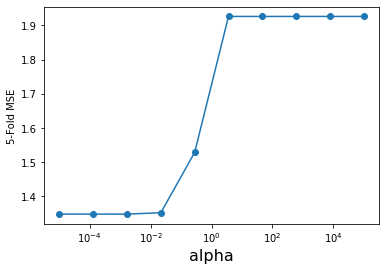

In [413]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-5,5,10)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [414]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']*10
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.35
MSE Modelo Lasso (test) : 1.63
RMSE Modelo Lasso (train): 1.16
RMSE Modelo Lasso (test) : 1.28
Lesividad 0.12409481510761391
Rango_horario -0.023164666475484225
Dia_semana -0.0013258067231120116
Distrito 0.0
Lugar_accidente 0.4737807750380238
Tipo_accidente 0.38610666158492485
Tipo_persona 0.0022581789794591522
Sexo -0.15577043494314238
Tramo_edad 0.04601805876235847
Distancia_ocio_km -0.0
Lejania_ocio -0.0
Distancia_radares_km -0.0
Lejania_radares -0.0
Year 0.0
Mes -0.0
Dia -0.0
Dia_habil 0.025185386101377643
Condiciones_adversas -0.008859958033328279


In [415]:
y_predict_Lasso=lasso.predict(X_test)
print(y_predict_Lasso.mean())
print(df['Tipo_vehiculo'].mean()) 
# Vemos que las medias del precio salen muy diferentes por lo que con este método no estamos prediciendo nada bien.

2.9170849845589544
0.783853878499502


### Arbol de decisión

best mean cross-validation score: 0.320
best parameters: {'max_depth': 9}


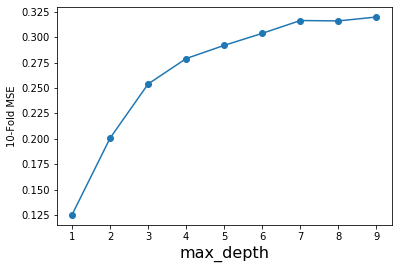

In [416]:
from sklearn.tree import DecisionTreeRegressor

# Vemos con un arbol de decisión
maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [418]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))

Train:  0.3647275008462043
Test:  0.19356951869686112


In [419]:
y_predict_decisionTree=grid.predict(X_test)
print(y_predict_decisionTree.mean())
print(df['Tipo_vehiculo'].mean()) 
# Vemos que las medias del precio salen muy parecidas, estaríamos prediciendo bien.

0.7813728968336231
0.783853878499502


### Random forest

best mean cross-validation score: 0.346
best parameters: {'max_depth': 14}


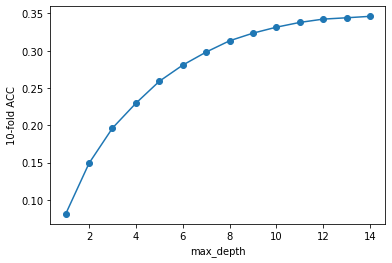

In [420]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

# Con grid search buscamos el óptimo
maxDepth = range(1, 15) 
# Probando veo que está entre estos valores los que mejor resultado dan, lo acoto para que no tarde tanto en cargar.
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train) # Al no ponerle Scoring lo hacemos con accuracy

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [422]:
maxDepthOptimo = 12 #grid.best_params_['max_depth'] # Cogemos 12 para reducir complejidad
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))
# Mejoramos respecto a Lasso

Train:  0.4187221157284833
Test:  0.24729676436960804


In [423]:
y_predict_bagModel=bagModel.predict(X_test)
print(y_predict_bagModel.mean())
print(df['Tipo_vehiculo'].mean()) 
# Vemos que las medias del precio salen muy parecidas, estaríamos prediciendo muy bien.

0.7816010436600821
0.783853878499502


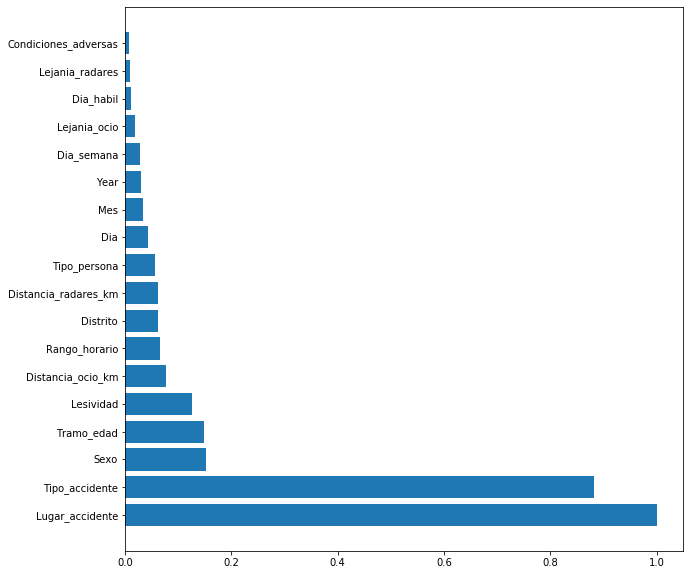

In [424]:
# Vamos a comprobar las variables que son importantes para valorar nuestro modelo
features = df.columns.drop(['Tipo_vehiculo'])

importances = bagModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.show()

In [432]:
# Vemos que las variables que le da más importancia con Random Forest son algo diferentes a las que nos da Lasso.
# Vamos a dropear las columnas hasta Dia a ver si mejoramos:
# Copio los data frames para dropear columnas sin afectar a mis data frames originales
df_Forest = df.copy()
df_test_Forest = df_test.copy()

In [433]:
df_Forest.drop(['Condiciones_adversas','Lejania_radares', 'Dia_habil',
                'Lejania_ocio', 'Dia_semana',  'Year','Mes', 'Dia'], axis=1, inplace=True)

In [434]:
df_test_Forest.drop(['Condiciones_adversas','Lejania_radares', 'Dia_habil',
                'Lejania_ocio', 'Dia_semana',  'Year','Mes', 'Dia'], axis=1, inplace=True)

In [435]:
# Cargamos el dataframe con nuestras columnas dropeadas
from sklearn import preprocessing
data = df_Forest.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, Tipo vehiculo
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_Forest.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [436]:
# Lo preparamos para realizar las pruebas
data_test = df_test_Forest.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, Tipo vehiculo
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test_Forest.columns[1:]

XtestScaled = scaler.transform(X_test) 

In [437]:
features = df_Forest.columns.drop(['Tipo_vehiculo'])

best mean cross-validation score: 0.353
best parameters: {'max_depth': 13}


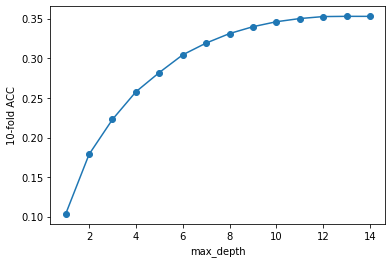

In [438]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1, 15) 
# Probando veo que está entre estos valores los que mejor resultado dan, lo acoto para que no tarde tanto en cargar.
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=10) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [440]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.4425102838699697
Test:  0.2433415398909775


In [443]:
y_predict_bagModel=bagModel.predict(X_test)
print(y_predict_bagModel.mean())
print(df['Tipo_vehiculo'].mean()) 
# Vemos que las medias del precio salen muy parecidas, estaríamos prediciendo muy bien.

0.7817850771089183
0.783853878499502


### Boosted Tree

In [425]:
from sklearn.ensemble import GradientBoostingRegressor
cv = 5

Niterations = [200, 250, 500,1000] 
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = cv, n_jobs=4)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.339
best parameters: {'learning_rate': 0.05, 'n_estimators': 250}


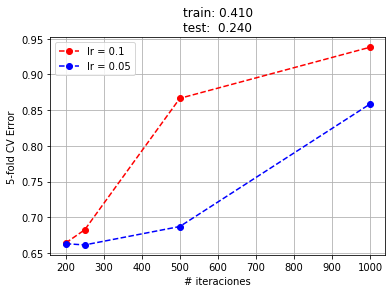

In [426]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=6,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [428]:
y_predict_boosted=bt.predict(X_test)
print(y_predict_boosted.mean())
print(df['Tipo_vehiculo'].mean()) 
# Vemos que las medias salen muy parecidas. Con boosted Tree obtenemos una buena predicción.

0.7853253879235372
0.783853878499502


In [429]:
boostedModel = GradientBoostingRegressor(max_depth=7).fit(X_train,y_train)

print("Train: ",boostedModel.score(X_train,y_train))
print("Test: ",boostedModel.score(X_test,y_test))

Train:  0.4298063835455457
Test:  0.24162791774370507


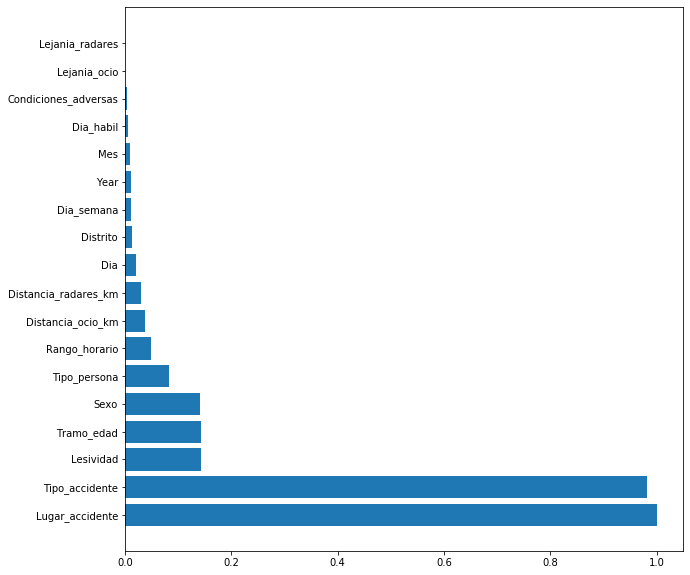

In [430]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

In [444]:
# Copio los data frames para dropear columnas sin afectar a mis data frames originales
df_Boosted = df.copy()
df_test_Boosted = df_test.copy()

In [446]:
# Vamos a quitar columnas según el gráfico de arriba hasta Distancia_ocio_km incluido.
df_Boosted.drop(['Lejania_radares', 'Lejania_ocio', 'Condiciones_adversas',
                 'Dia_habil', 'Mes', 'Year', 'Dia_semana', 'Distrito',
                 'Dia', 'Distancia_radares_km','Distancia_ocio_km'], axis=1, inplace=True)

In [447]:
df_test_Boosted.drop(['Lejania_radares', 'Lejania_ocio', 'Condiciones_adversas',
                 'Dia_habil', 'Mes', 'Year', 'Dia_semana', 'Distrito',
                 'Dia', 'Distancia_radares_km','Distancia_ocio_km'], axis=1, inplace=True)

In [448]:
# Lo preparamos para realizar las pruebas
from sklearn import preprocessing
data = df_Boosted.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, Tipo vehiculo
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df_Boosted.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

In [449]:
# Lo preparamos para realizar las pruebas
data_test = df_test_Boosted.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, Tipo vehiculo
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test_Boosted.columns[1:]

XtestScaled = scaler.transform(X_test) 

In [450]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import GradientBoostingRegressor

Niterations = [1500,2000, 2500]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.357
best parameters: {'learning_rate': 0.05, 'n_estimators': 2000}


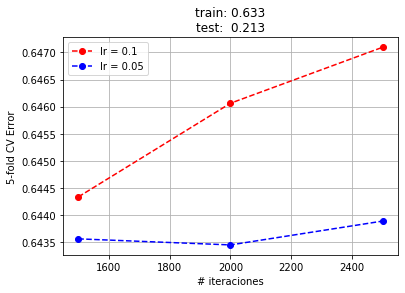

In [451]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=8,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()
# Vemos que empeoran los resultados de test.

In [454]:
y_predict_boosted=bt.predict(X_test)
print(y_predict_boosted.mean())
print(df['Tipo_vehiculo'].mean()) 
# Vemos que las medias salen muy parecidas. Con boosted Tree obtenemos una buena predicción.

0.7905223969656208
0.783853878499502


In [455]:
boostedModel = GradientBoostingRegressor(max_depth=7).fit(X_train,y_train)

print("Train: ",boostedModel.score(X_train,y_train))
print("Test: ",boostedModel.score(X_test,y_test))

Train:  0.4120274575346735
Test:  0.2315560939005894
